# Appendix

In [1]:
%reset -f

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dadapy import Data
from dadapy import DataSets as ds
from sklearn.preprocessing import StandardScaler
from utils_perturb import return_inf_imb_perturbed_d1_to_d2
from utils_zero_dist_imbalance import _get_imbalance_from_d1_to_d2

plt.rcParams['text.usetex'] = True

In [3]:
df = pd.read_excel('../Data/Dataset_eua_IMv4.3.xlsx')

In [4]:
eua = df['eua_last']
X = df.iloc[:,3:]
X = X.values
y = eua.values
y = y.reshape(-1,1)

labels = np.array(['GPR', 'VSTOXX', 'Unc. EUR/USD', 'Unc. EUR/JPY', 'Unc. EUR/GBP', 'Unc. EUR/CHF',
       'Nat. Gas', 'Elec. p. SPAIN', 'Elec. p. GER', 'Elec. p. IT',
       'Elec. p. FR', 'Brent Oil', 'Coal', 'Gold', 'EUR/USD Spot',
       'EUR/JPY Spot', 'EUR/GBP Spot', 'EUR/CHF Spot',
       'Bloom. Energy p. ind.', 'Sol. ESG fossil ind.',
       'SP Euro50 Env. ind.', 'MSCI Ener. sec. ind.', 'ERIX ind.', 'EUROnext100', 'IBEX35', 'DAX',
       'CAC', 'FTSEmib', 'EUROSTOXX Elect. ind.', '10 Year Bond y.', '3 Month Bond y.'])

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [6]:
X_3 = X[:1782,:]
y_3 = y[:1782,:]

X_4 = X[1782:,:]
y_4 = y[1782:,:]

In [7]:
d_3 = Data(X_3, maxk=X_3.shape[0]-1)
d_4 = Data(X_4, maxk=X_4.shape[0]-1)

d_y_3 = Data(y_3, maxk=y_3.shape[0]-1)
d_y_4 = Data(y_4, maxk=y_4.shape[0]-1)

d_y_3.compute_distances()
d_y_4.compute_distances()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical poin

In [8]:
sigma = 1e-3

inf_imb_X_to_y = []

for i in range(X_3.shape[1]):
    d_3_i = Data(X_3[:, [i]], maxk=X_3.shape[0]-1)
    inf_imb_X_to_y.append(return_inf_imb_perturbed_d1_to_d2(d_3_i, d_y_3, sigma=sigma))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most

In [9]:
means_X_to_y = [x[0] for x in inf_imb_X_to_y]
stds_X_to_y = [x[1] for x in inf_imb_X_to_y]

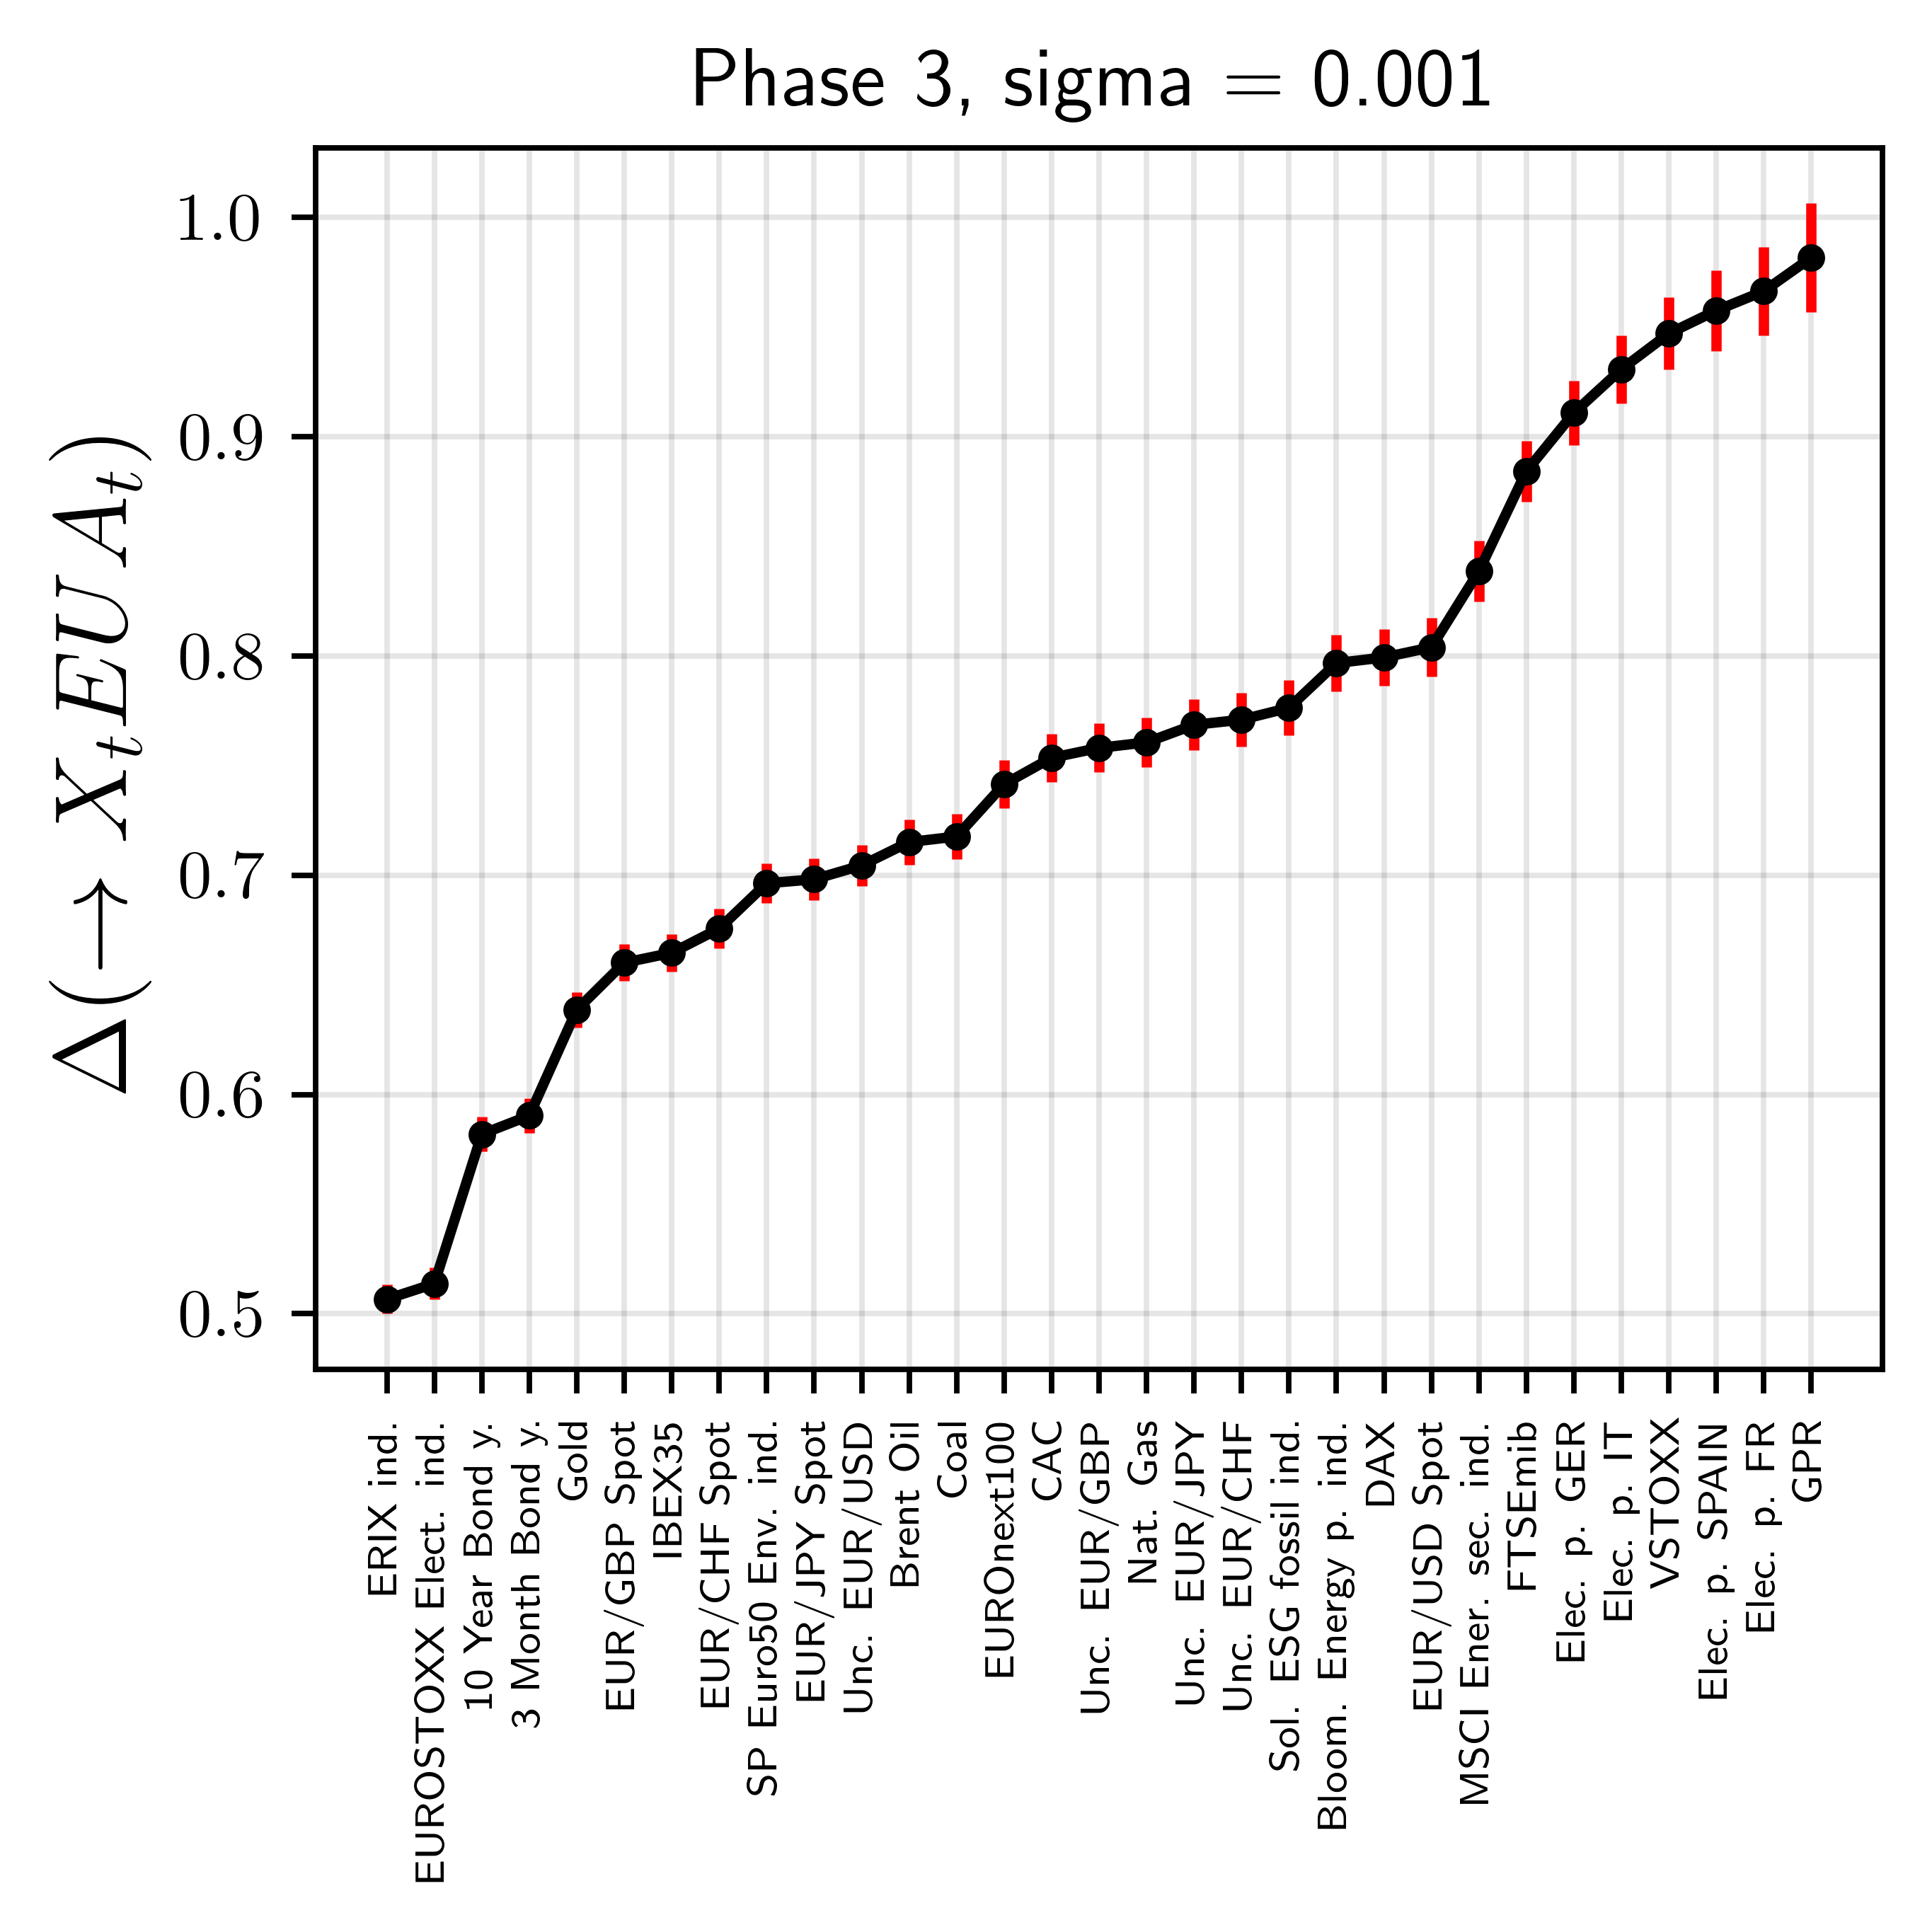

In [10]:
fig,ax=plt.subplots(figsize=(4,4), dpi=700)
ax.set_facecolor('white')
plt.errorbar(range(len(means_X_to_y)), np.sort(means_X_to_y), yerr=np.sort(stds_X_to_y), fmt='o', ls = '-', color='black',markersize=3, ecolor='r')
plt.xticks(range(len(means_X_to_y)), labels[np.argsort(means_X_to_y)], rotation=90, color='black', fontsize=6)
plt.title('Phase 3, sigma = {}'.format(sigma))
plt.grid(axis='both',color="black", alpha=.1)
plt.ylabel(r'$\Delta(\rightarrow X_{t}EUA_{t})$', fontsize=15)
plt.tight_layout()
plt.savefig('../Figures/FigA2_Inf_Imb_error_bars_p34_{}.png'.format(sigma), dpi=700, bbox_inches='tight')

In [11]:
inf_imb_X_to_y = []

for i in range(X_4.shape[1]):
    d_4_i = Data(X_4[:, [i]], maxk=X_4.shape[0]-1)
    inf_imb_X_to_y.append(return_inf_imb_perturbed_d1_to_d2(d_4_i, d_y_4, sigma=sigma))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float

In [12]:
means_X_to_y = [x[0] for x in inf_imb_X_to_y]
stds_X_to_y = [x[1] for x in inf_imb_X_to_y]

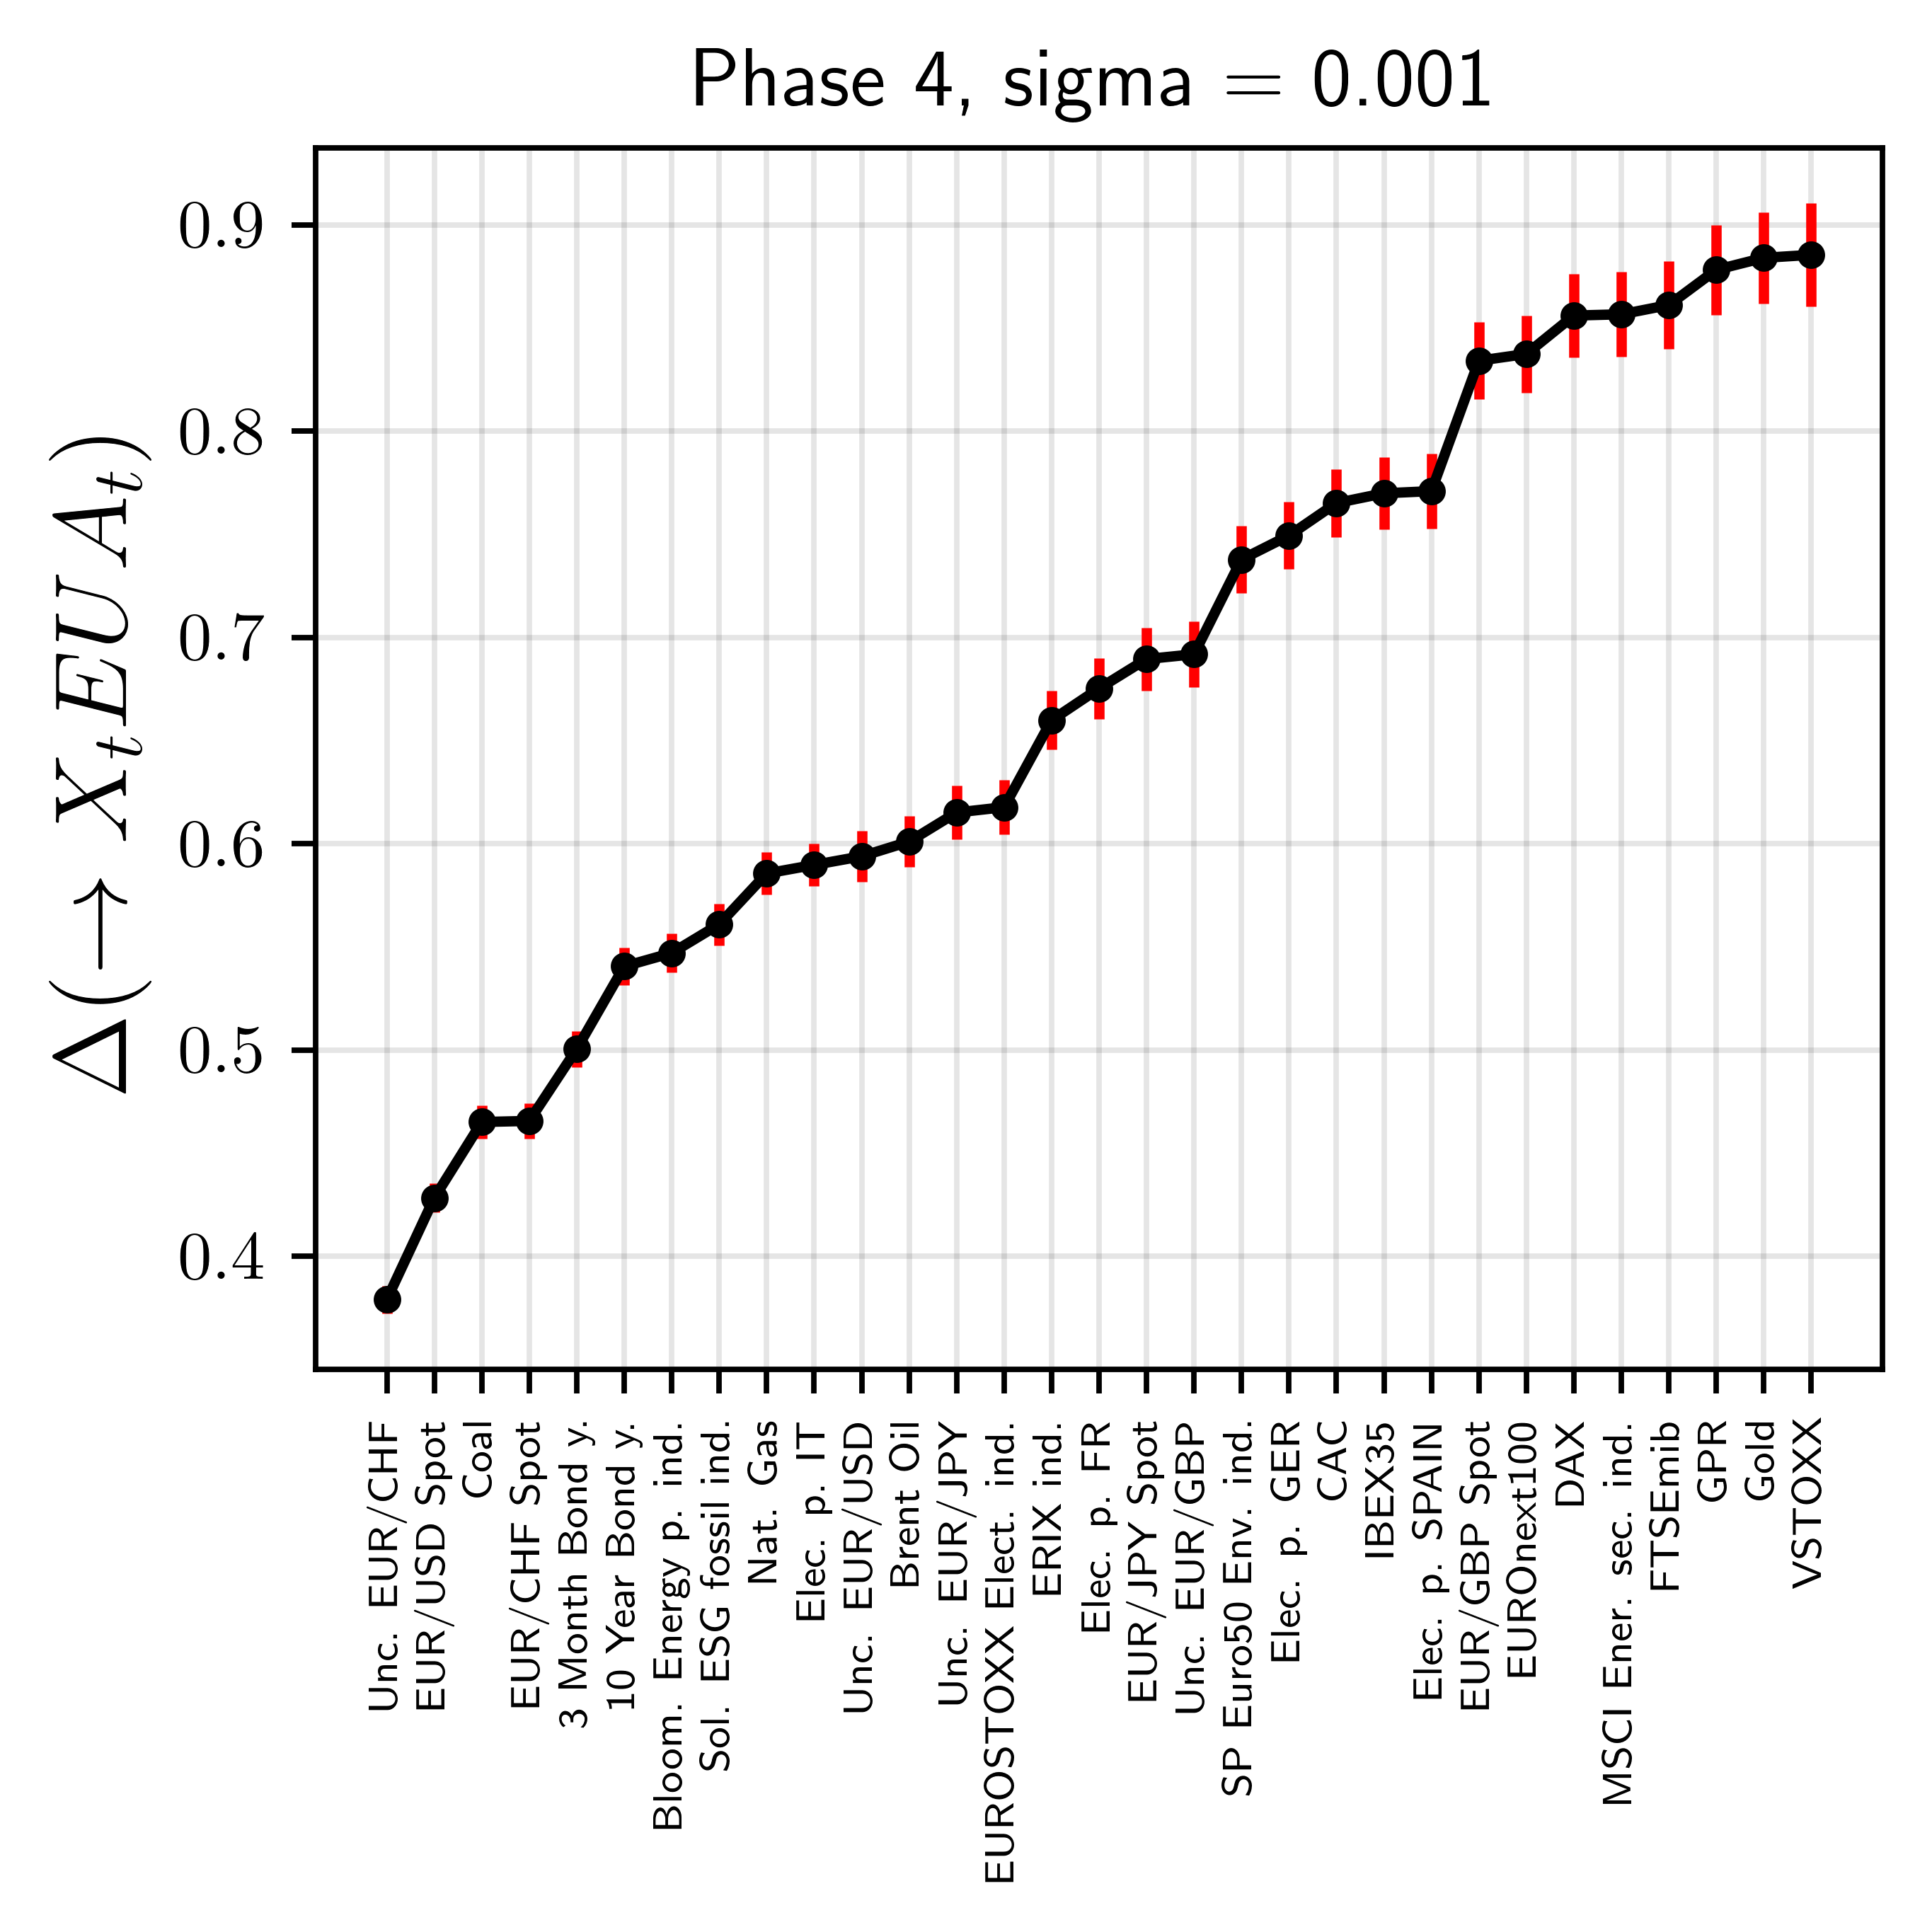

In [13]:
fig,ax=plt.subplots(figsize=(4,4), dpi=700)
ax.set_facecolor('white')
plt.errorbar(range(len(means_X_to_y)), np.sort(means_X_to_y), yerr=np.sort(stds_X_to_y), fmt='o', ls = '-', color='black',markersize=3, ecolor='r')
plt.xticks(range(len(means_X_to_y)), labels[np.argsort(means_X_to_y)], rotation=90, color='black', fontsize=6)
plt.title('Phase 4, sigma = {}'.format(sigma))
plt.grid(axis='both',color="black", alpha=.1)
plt.ylabel(r'$\Delta(\rightarrow X_{t}EUA_{t})$', fontsize=15)
plt.tight_layout()
plt.savefig('../Figures/FigA2_Inf_Imb_error_bars_p34_{}.png'.format(sigma), dpi = 700, bbox_inches='tight')